In [1]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By

In [2]:
driver = webdriver.Chrome()  


In [3]:
url = 'https://webscraper.io/test-sites/e-commerce/allinone/computers/laptops'
driver.get(url)

In [4]:
devicename = []
descriptionslist = []
ratingslist = []
priceslist = []

device_names = driver.find_elements(By.CLASS_NAME, 'title')
for device in device_names:
    devicename.append(device.text)

device_descriptions = driver.find_elements(By.CLASS_NAME, 'description')
for description in device_descriptions:
    descriptionslist.append(description.text)

ratings = driver.find_elements(By.XPATH, "//p[@data-rating]")
for rating in ratings:
    ratingslist.append(rating.get_attribute('data-rating'))

prices = driver.find_elements(By.CLASS_NAME, 'price')
for price in prices:
    priceslist.append(price.text)

driver.quit()

In [5]:
data = {
    'Device Name': devicename,
    'Description': descriptionslist,
    'Rating': ratingslist,
    'Price': priceslist
}

df = pd.DataFrame(data)

df.to_csv('laptops_data.csv', index=True)

print("Data has been saved to laptops_data.csv")

Data has been saved to laptops_data.csv


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [7]:
url = 'laptops_data.csv'
data = pd.read_csv(url)

In [8]:
data['Price'] = data['Price'].replace('[\$,]', '', regex=True).astype(float)  
data['Rating'] = data['Rating'].astype(int)

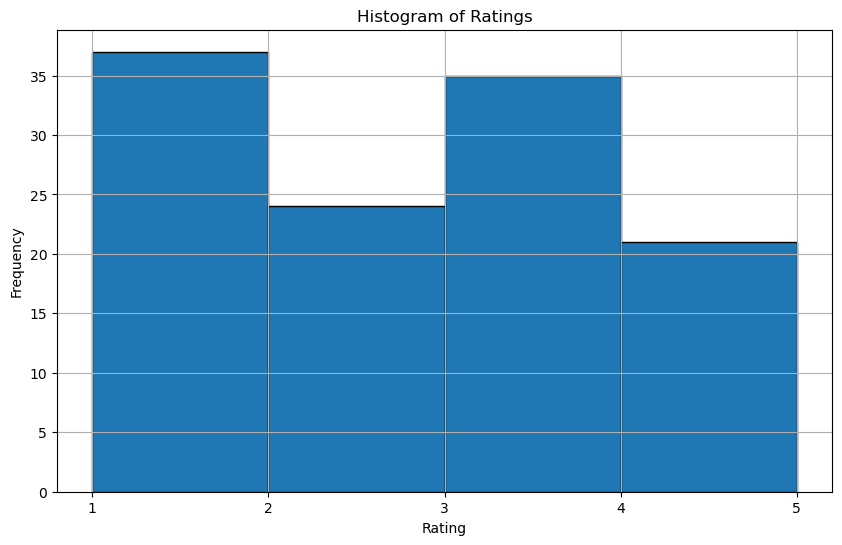

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(data['Rating'], bins=range(1, 6), edgecolor='black')
plt.title('Histogram of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(range(1, 6))
plt.grid(True)
plt.show()

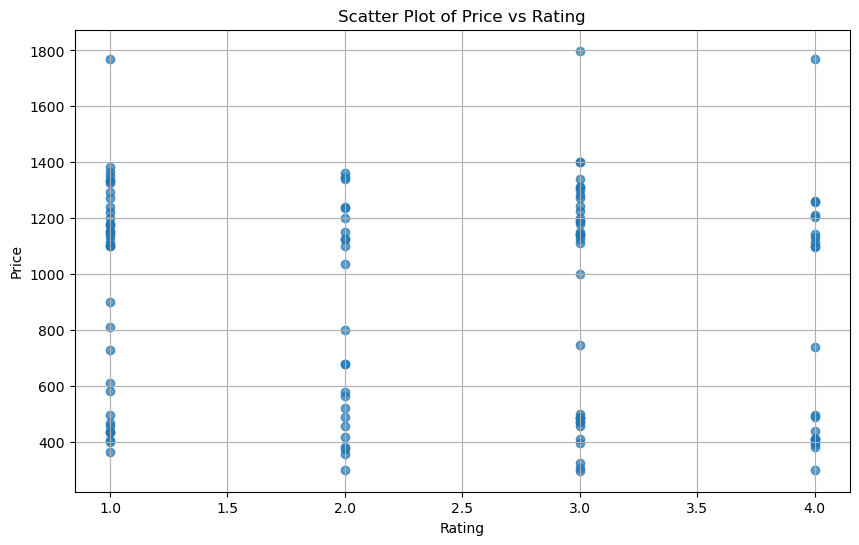

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Rating'], data['Price'], alpha=0.7)
plt.title('Scatter Plot of Price vs Rating')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.grid(True)
plt.show()

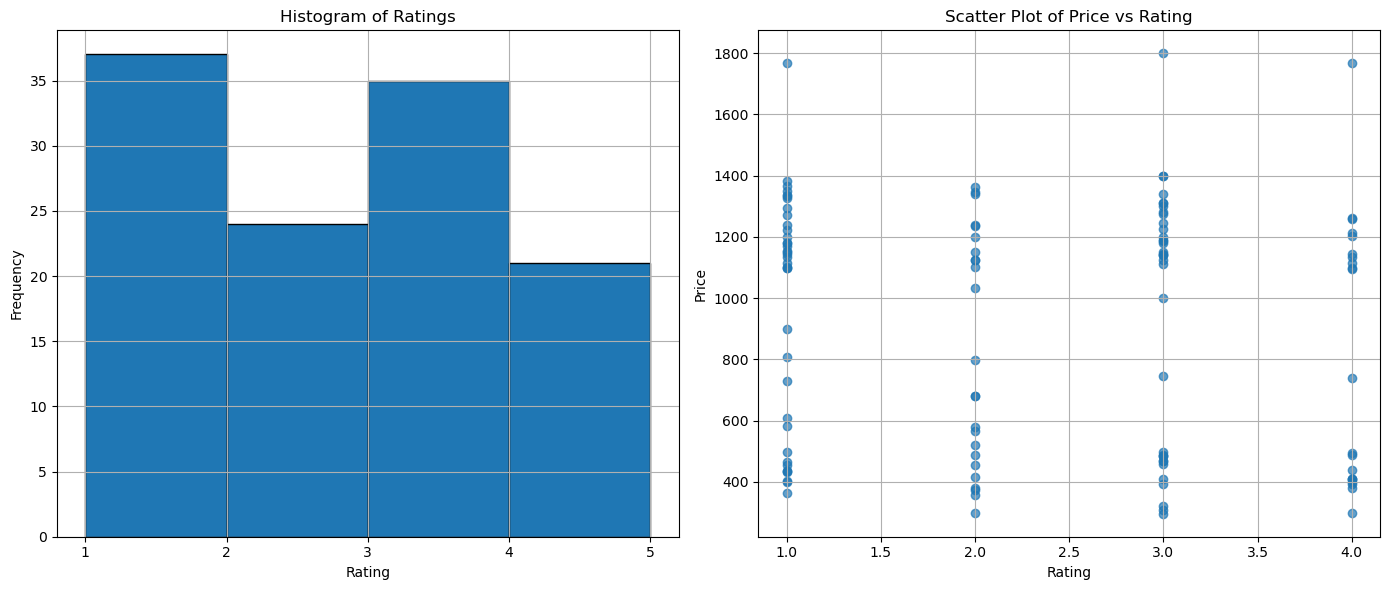

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
axs[0].hist(data['Rating'], bins=range(1, 6), edgecolor='black')
axs[0].set_title('Histogram of Ratings')
axs[0].set_xlabel('Rating')
axs[0].set_ylabel('Frequency')
axs[0].set_xticks(range(1, 6))
axs[0].grid(True)
scatter = axs[1].scatter(data['Rating'], data['Price'], alpha=0.7)
axs[1].set_title('Scatter Plot of Price vs Rating')
axs[1].set_xlabel('Rating')
axs[1].set_ylabel('Price')
axs[1].grid(True)

plt.tight_layout()
plt.show()

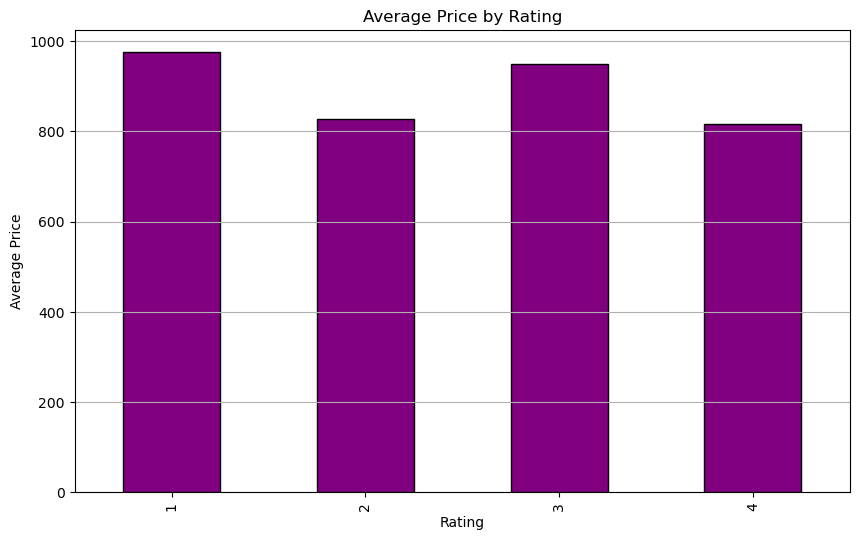

In [18]:
avg_price_by_rating = data.groupby('Rating')['Price'].mean()
plt.figure(figsize=(10, 6))
avg_price_by_rating.plot(kind='bar', color='purple', edgecolor='black')
plt.title('Average Price by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Price')
plt.xticks(range(len(avg_price_by_rating.index)), avg_price_by_rating.index)
plt.grid(axis='y')
plt.show()


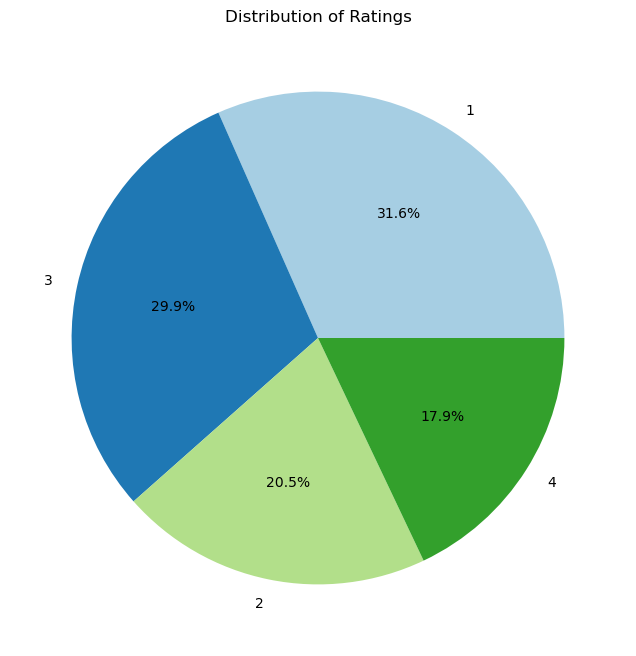

In [19]:
rating_counts = data['Rating'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(rating_counts))))
plt.title('Distribution of Ratings')
plt.show()

In [20]:
df = pd.read_csv('laptops_data.csv')

In [21]:
fig = px.line_3d(df, x="Device Name", y="Rating", z="Price")

fig.show()


In [22]:
fig = px.scatter_3d(df,x="Device Name", y="Rating", z="Price", color='Price',
                    size='Rating', symbol='Rating')

fig.show()

In [23]:
fig = px.bar(df, x='Rating', y="Price")

fig.show()

In [33]:
df['Price'] = df['Price'].replace('[\$,]', '', regex=True).astype(float)  
fig = px.bar(df, x="Device Name", y="Rating", color='Price_Bins',
             facet_row='Rating', facet_col='Price_Bins', 
             facet_col_spacing=0.01)
fig.show()

In [36]:
fig = px.box(df, x="Rating", y="Price")

fig.show()



print(fig)

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Rating=%{x}<br>Price=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x': array([3, 2, 4, 3, 3, 2, 1, 2, 2, 4, 4, 3, 1, 4, 1, 4, 3, 4, 4, 2, 1, 1, 1, 4,
                          1, 2, 3, 1, 3, 3, 3, 3, 2, 3, 4, 4, 1, 3, 2, 2, 2, 1, 1, 2, 2, 1, 4, 3,
                          2, 1, 1, 3, 2, 4, 1, 4, 1, 2, 1, 3, 4, 1, 2, 2, 3, 4, 1, 3, 3, 4, 1, 3,
                          3, 1, 2, 1, 1, 3, 1, 1, 3, 3, 1, 2, 3, 4, 4, 1, 3, 2, 2, 1, 3, 4, 4, 1,
                          3, 3, 1, 3, 3, 3, 1, 1, 1, 2, 3, 2, 1, 2, 1, 1, 3, 3, 4, 1, 3],
                         dtype=int64),
              'x0': ' ',
              'xaxis': 'x',
              'y': array([ 295.99,

In [38]:
fig = px.histogram(df, x="Price")
fig.show()
fig = px.histogram(df, x="Rating", color='Price',
                   nbins=50, histnorm='percent',
                   barmode='overlay')
fig.show()

In [39]:
fig = px.violin(df, x="Rating", y="Price")
fig.show()
fig = px.violin(df, x="Rating", y="Price", color='Device Name',
                facet_row='Rating', box=True)
fig.show()

In [40]:
fig = px.pie(df, values="Rating", names="Price")
fig.show()
fig = px.pie(df, values="Rating", names="Device Name",
             color_discrete_sequence=px.colors.sequential.RdBu,
             opacity=0.7, hole=0.5)
fig.show()